
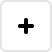
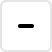
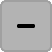
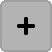
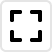
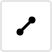
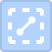
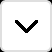
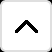
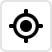

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
LetsPlot.setup_html()

In [2]:
w, h = 600, 400

In [3]:
# default theme
p = (
    ggplot({'x': list(range(5)), 'y': list(range(5))}, aes('x', 'y')) +
    geom_point(aes(size='y', fill="y"),tooltips=layer_tooltips().title("TITLE").line('label|value')) +
    labs(title='The plot title', 
         subtitle="The plot subtitle",
         caption="The plot caption",
         x='X axis label', 
         y='Y axis label', 
         fill='Fill legend title',
         size='Size legend title'
    )
)
p

In [4]:
# theme functions
bunch = GGBunch()
bunch.add_plot(p + ggtitle("theme_grey()") + theme_grey(), 0, 0, w, h)
bunch.add_plot(p + ggtitle("theme_none()") + theme_none(), w, 0, w, h)
bunch.show()

In [5]:
e_line = element_line(color='light_green', size=3)
e_rect = element_rect(color='#2c7fb8', fill='#edf8b1', size=2)
e_text = element_text(color='#f1a354', face='italic')

# tooltips

bunch = GGBunch()

bunch.add_plot(p + theme(axis_tooltip=e_rect) +
               ggtitle("axis_tooltip = e_rect", subtitle="axis tooltip -> fill + text/border color + stroke width"),
               0, 0)

bunch.add_plot(p + theme(axis_tooltip=e_line) +
               ggtitle("axis_tooltip = e_line", subtitle="axis tooltip -> text/border color + stroke width"),
               w, 0)

bunch.add_plot(p + theme(axis_tooltip=e_text) +
               ggtitle("axis_tooltip = e_text", subtitle="axis tooltip -> text/border color"),
               0, h*1.1)

bunch.add_plot(p + theme(axis_tooltip_text=e_text) +
               ggtitle("axis_tooltip_text = e_text", subtitle="axis tooltip -> text color + font face"),
               w, h*1.1)

bunch.add_plot(p + theme(tooltip_text=e_text) +
               ggtitle("tooltip_text = e_text", subtitle="all tooltip -> text color + font face"),
               0, h*2.2)

bunch.add_plot(p + theme(tooltip=e_rect, tooltip_text=e_text) +
               ggtitle("+ tooltip=e_rect", subtitle="-> tooltip rect"),
               w, h*2.2)

bunch.show()

In [6]:
# Theme options  
theme_opts = theme(
        plot_title=element_text('red', face='bold_italic'),
        plot_subtitle=element_text('pink', face='normal'),
        plot_caption=element_text('gray', face='italic'),
    
        legend_title=element_text('#cc8f00'),
        legend_text=element_text('orange', face='italic'),
    
        axis_title_x=element_text('dark_green'),
        axis_text_x=element_text('#00b300'),
        axis_tooltip_text_x=element_text(color='light_green'),

        axis_title_y=element_text('dark_blue'),
        axis_text_y=element_text(color='#9e9eff'),
        axis_tooltip_text_y=element_text(color='light_blue'),

        tooltip=element_rect(color='#54278f', fill='#fcfbfd'),
        tooltip_text=element_text(color='#54278f', face='italic')    
)


In [7]:
p2 = p + theme_opts
p2

In [8]:
p2 + coord_flip() 

In [9]:
data = dict(
    supp = ['OJ', 'OJ', 'OJ', 'VC', 'VC', 'VC'],
    dose = [0.5, 1.0, 2.0, 0.5, 1.0, 2.0],
    length = [13.23, 22.70, 26.06, 7.98, 16.77, 26.14],
    len_min = [11.83, 21.2, 24.50, 4.24, 15.26, 23.35],
    len_max = [15.63, 24.9, 27.11, 10.72, 19.28, 28.93]
)


In [10]:
# bars
bar_labels=labs(
     title="Tooth length per dose",
     subtitle="geom_bar", 
     caption="The ToothGrowth dataset",
     x = "Dosage levels (mg)",
     y ="Tooth length", 
     color="Supplements",
     fill="Supplements"
)
bar_theme = theme(
        title=element_text('#3f007d'),

        plot_subtitle=element_text(face='bold_italic'),
        plot_caption=element_text(face='italic'),

        legend_title=element_text('#d95f0e'),
        legend_text=element_text('#fe9929', face='italic'),

        axis_title=element_text(face='bold'),
        axis_tooltip_text=element_text(color='light_pink'),
    
        axis_title_x=element_text('#a50f15'),
        axis_text_x=element_text('pink'),

        axis_title_y=element_text('dark_green'),
        axis_text_y=element_text('#a1d99b'),

        tooltip_text=element_text(color='#54278f', face='italic')
)


bar = (
    ggplot(data) + 
    geom_bar(aes(x='dose', color='supp', y='length', fill='supp'), stat='identity', position='dodge') +  
    bar_labels +
    bar_theme
)
bar

In [11]:
# coord flip
bar + coord_flip()

In [12]:
# orientation "y"
(
    ggplot(data) +
    geom_bar(aes(x='length', color='supp', y='dose', fill='supp'), 
             stat='identity', position='dodge', orientation="y") +
    bar_labels +
    bar_theme
)

In [13]:
# Outlier Tooltips

crossbar = (
      ggplot(data, aes(x='dose', color='supp')) +
      geom_crossbar(aes(ymin='len_min', ymax='len_max', middle='length'), fatten=5) +
      labs(title='geom_crossbar') +
      theme(
        plot_title=element_text('#990000', face='bold_italic'),

        legend_title=element_text('#cc8f00'),
        legend_text=element_text('orange', face='italic'),
    
        axis_title=element_text('#9b2d30'),
        axis_text=element_text('pink'),
        axis_tooltip=element_rect(color='pink', fill='#6c4675', size = 2.0),
        axis_tooltip_text=element_text(color='pink'),

        tooltip=element_rect(color='dark_blue', fill='#fff5ee'),
        tooltip_text=element_text(color='dark_blue', face='italic')
    )
)

crossbar 

In [14]:
# facets

crossbar + facet_grid('supp') + theme(strip_text=element_text(color='#990000', face='bold'))

In [15]:
# GGbunch with different theme options

bars_bunch = GGBunch()
bars_bunch.add_plot(bar, 0, 0)
bars_bunch.add_plot(crossbar, 0, h*1.1)
bars_bunch

In [16]:
# Save to SVG
#ggsave(bars_bunch, "bars_bunch.svg")


#from IPython.display import SVG
#display(SVG(filename="lets-plot-images/bars_bunch.svg"))